In [14]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from config import plot_path, model
import qcd_axion_wkb
import density_plot

## Compute $\kappa$ and $\iota$

In [12]:
E1, E2, n, C, f_c, f_a, Lambda_QCD, kappa, N, rho_c, g_0, g_osc, T_0, gamma, theta_i, eV = \
 sp.symbols("E1, E2, n, C, f_c, f_a, Lambda_QCD, kappa, N, rho_c, g_0, g_osc, T_0, gamma, theta_i, eV")
GeV = 10**9 * eV
T_osc = kappa * (E1 / (f_a / N))**(1/(1 + n/2)/2)
#m_a = 6*10**(-10) * eV * 10**16 * GeV / (f_a / N)
m_a = E2 * E1 / (f_a / N)
zeta = C * (Lambda_QCD / T_osc)**n # ok
m_a_osc = m_a * zeta # ok
# s up to a constant factor
s0 = g_0 * T_0**3 # ok
s_osc = g_osc * T_osc**3 # ok
n_a = f_c / 2 * m_a_osc * (f_a / N)**2 * theta_i**2 
rho_a = n_a * m_a * s0 / s_osc * gamma
Omega_a = rho_a / rho_c # ok
Omega_a

C*E1**2*E2**2*T_0**3*f_c*g_0*gamma*theta_i**2*(E1*N/f_a)**(-3/(2*(n/2 + 1)))*(Lambda_QCD*(E1*N/f_a)**(-1/(2*(n/2 + 1)))/kappa)**n/(2*g_osc*kappa**3*rho_c)

In [13]:
show(qcd_axion_wkb.kappa)
show(qcd_axion_wkb.iota)

1.324162e+08 
1.059604e+04 


## Plot WKB Approximation 

/home/janik/Documents/bachelor/Src/density_plot.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq), levels)


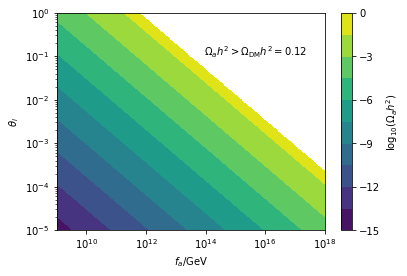

In [15]:
# plot
N = 300
f_a = np.logspace(9, 18, N) * 1e9 # [eV]
theta_i = np.logspace(-5, 0, N) # [RAD]
Omega_a_h_sq = qcd_axion_wkb.compute_analytic_relic_density(theta_i, f_a)
fig = density_plot.plot_density(theta_i, f_a, Omega_a_h_sq, plot_type="contourf")
fig.savefig(plot_path + "/qcd_relic_denstiy_wkb_plot.pdf")